In [1]:
import json
eval_filename = 'GroupBar50000.json'
with open(eval_filename) as f:
    data = json.load(f)
import os

In [2]:
from PIL import Image, ImageDraw

In [3]:
# filename = 'c49285ca77f6aff6214dad492b688113_d3d3LmRhbmUuZ292LmNvCTE3MC4yMzguNjQuNzg=.xls-0-0.png'
filename = 'c49830551627d9220fc08c5e9fe007b6_d3d3Lmdvdi5zY290CTEzNC4xOS4xNjEuMjQ5.xls-25-0.png'
filename = 'c49e369ac4e7b5cf62a8849afe9ecfb8_d3d3LnJpbnlhLm1hZmYuZ28uanAJMTA0LjgwLjg5LjUx.xls-0-0.png'
filename = 'cb8deb3bb127170077b71e1eea603711_d3d3LmNodXJjaGlsbGNvdW50eS5vcmcJMjA4LjkwLjE4OC4xNjI=-0-2.png'
filename = 'f01b2170e8a628cb3b297b20fda87620_ZGVtby5tdWx0aW1lZGlhcmQuY29tCTEwOC4xNjMuMjM4LjI0NA==-0-3.png'

In [4]:
# im = Image.open('../data/bardata(1031)/bar/images/val2019/'+filename)
# draw = ImageDraw.Draw(im)
# for bbox in data[filename]:
#     draw.ellipse((bbox[0]-5, bbox[1]-5, bbox[0]+5, bbox[1]+5), fill=(255, 0, 0), outline=(0, 0, 0))
#     draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(255, 0, 0), outline=(0, 0, 0))

In [5]:
# img_dir = '../data/linedata(1028)/line/images/test2019/'
#img_dir = '../data/piedata(1008)/pie/images/test2019/'
img_dir = '../data/bardata(1031)/bar/images/val2019/'
filename = os.listdir(img_dir)[32]
im = Image.open(img_dir+filename)
draw = ImageDraw.Draw(im)
keys = data[filename][0]['1']
cens = data[filename][1]['1']
if 'Group' in eval_filename:
    groups = data[filename][2]
    for group in groups:
        # 提取分组中的中心点坐标。
        cen_in_group = group[0:2]
        # 遍历分组中的关键点。
        for k in range(1, len(group[:-1])//2):
            key_in_group = group[2*k:2*k+2]
            draw.line([tuple(cen_in_group),tuple(key_in_group)], fill ="blue", width = 1)
for bbox in keys:
    if bbox[0] > 0.4:
        draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(255, 0, 0), outline=(0, 0, 0))
for bbox in cens:
    if bbox[0] > 0.4:
        draw.ellipse((bbox[2]-5, bbox[3]-5, bbox[2]+5, bbox[3]+5), fill=(0, 255, 0), outline=(0, 0, 0))


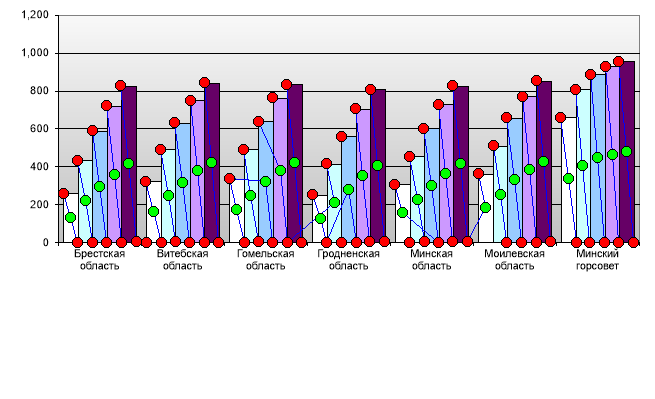

In [6]:
im

In [7]:
import os
os.listdir('../data/bardata(1031)/bar/images/val2019/')[:10]

['e150a9993e499516fbcb7afbd9e77cfb_bWFya2V0aW5nZGlnaXRhbC5ibG9nCTEwNy4xODAuNDYuMTY3-2-0.png',
 'fcf045ca3ceeb6d658fc5460ddc66953_d3d3LndlYnRlbmVyaWZlLmNvbQk4Mi4yMjMuMjUyLjE4-1-2.png',
 'ef430e2297e87f50a8db403d905e01db_cnNub25saW5lLm9yZy51awkxODUuMTIzLjk3LjIyNg==-0-0.png',
 'dc3abe7c594cceb95c59d89d184ed9c7_Z3JhY2UyLmZpZ3VyZS5uegk1Mi42My40NC4yMjg=.xls-3-4.png',
 'fa0857f2e0eabbcc6797e2514a202e1b_c3BtaWNraWV3aWN6LmVkdXBhZ2Uub3JnCTg4Ljk5LjYwLjk3.xls-3-0.png',
 'fe500f9a8050f3455bddcdbc4f08799e_cmVwb3J0Lm5paC5nb3YJMTU2LjQwLjIxNC4xNTI=-0-1.png',
 'd9b35c3434c9207ae4d8f5343c358804_d3d3Lmtva3V5by5jby5qcAk1Mi4xOTcuMTUyLjE1Ng==.xls-3-0.png',
 'df8aeba333ce40b07b279322be14ba12_d3d3LmlzbXUub3JnCTkxLjI0MS44Ni4xMDE=.xls-1-1.png',
 'daed088de4eab409c4a66176b325bcf1_d3d3LmJpemJ1ZGcuY29tCTI3LjEyNC4xMjQuOTc=-0-0.png',
 'd53a3e90e6aa406aaa758b75f24cb70d_b2xhbWdyb3VwLmNvbQkxMzAuMjExLjgwLjE3OQ==-1-1.png']

In [8]:
im = Image.open('../data/piedata(1008)/pie/images/val2019/fa266c2d49db01fdb7ce6ea711764300_d3d3Lmdvdi5zY290CTEzNC4xOS4xNjEuMjQ5-37-1.png')
draw = ImageDraw.Draw(im)

draw.ellipse((202-5, 37-5, 202+5, 37+5), fill=(255, 0, 0), outline=(0, 0, 0))
draw.ellipse((268-5, 73-5, 268+5, 73+5), fill=(255, 0, 0), outline=(0, 0, 0))
draw.ellipse((202-5, 115-5, 202+5, 115+5), fill=(255, 0, 0), outline=(0, 0, 0))

draw.ellipse((180-5, 155-5, 180+5, 155+5), fill=(255, 0, 0), outline=(0, 0, 0))

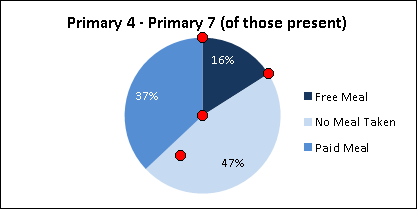

In [9]:
im

In [10]:
def decide(a, b, c):
    ca = [c[0]-a[0], c[1]-a[1]]
    cb = [c[0]-b[0], c[1]-b[1]]
    if ca[0]*cb[1]-ca[1]*cb[0] > 0:
        clockwise_center = [(a[0]+b[0]+c[0])/3., (a[1]+b[1]+c[1])/3.]
        print("clockwise center: ", clockwise_center)
    else:
        counter_clockwise_center = [2*c[0]-(a[0]+b[0]+c[0])/3., 2*c[1]-(a[1]+b[1]+c[1])/3.]
        print("counter clockwise center: ", counter_clockwise_center)

In [11]:
decide((268, 73), (202, 37), (202, 115))

counter clockwise center:  [180.0, 155.0]
